# File descriptions

<ul>
	<li><strong>train.csv</strong>&nbsp;- Tabular/text data for the training set</li>
	<li><strong>test.csv</strong>&nbsp;- Tabular/text data for the test set</li>
	<li><strong>sample_submission.csv</strong>&nbsp;- A sample submission file in the correct format</li>
	<li><strong>breed_labels.csv</strong>&nbsp;- Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.</li>
	<li><strong>color_labels.csv</strong>&nbsp;- Contains ColorName for each ColorID</li>
	<li><strong>state_labels.csv</strong>&nbsp;- Contains StateName for each StateID</li>
</ul>


# Data Fields

<ul>
	<li><strong>PetID</strong>&nbsp;- Unique hash ID of pet profile</li>
	<li><strong>AdoptionSpeed</strong>&nbsp;- Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.</li>
	<li><strong>Type</strong>&nbsp;- Type of animal&nbsp;<em>(1 = Dog, 2 = Cat)</em></li>
	<li><strong>Name</strong>&nbsp;- Name of pet&nbsp;<em>(Empty if not named)</em></li>
	<li><strong>Age</strong>&nbsp;- Age of pet when listed, in months</li>
	<li><strong>Breed1</strong>&nbsp;- Primary breed of pet&nbsp;<em>(Refer to BreedLabels dictionary)</em></li>
	<li><strong>Breed2</strong>&nbsp;- Secondary breed of pet, if pet is of mixed breed&nbsp;<em>(Refer to BreedLabels dictionary)</em></li>
	<li><strong>Gender</strong>&nbsp;- Gender of pet&nbsp;<em>(1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)</em></li>
	<li><strong>Color1</strong>&nbsp;- Color 1 of pet&nbsp;<em>(Refer to ColorLabels dictionary)</em></li>
	<li><strong>Color2</strong>&nbsp;- Color 2 of pet&nbsp;<em>(Refer to ColorLabels dictionary)</em></li>
	<li><strong>Color3</strong>&nbsp;- Color 3 of pet&nbsp;<em>(Refer to ColorLabels dictionary)</em></li>
	<li><strong>MaturitySize</strong>&nbsp;- Size at maturity&nbsp;<em>(1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)</em></li>
	<li><strong>FurLength</strong>&nbsp;- Fur length&nbsp;<em>(1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)</em></li>
	<li><strong>Vaccinated</strong>&nbsp;- Pet has been vaccinated&nbsp;<em>(1 = Yes, 2 = No, 3 = Not Sure)</em></li>
	<li><strong>Dewormed</strong>&nbsp;- Pet has been dewormed&nbsp;<em>(1 = Yes, 2 = No, 3 = Not Sure)</em></li>
	<li><strong>Sterilized</strong>&nbsp;- Pet has been spayed / neutered&nbsp;<em>(1 = Yes, 2 = No, 3 = Not Sure)</em></li>
	<li><strong>Health</strong>&nbsp;- Health Condition&nbsp;<em>(1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)</em></li>
	<li><strong>Quantity</strong>&nbsp;- Number of pets represented in profile</li>
	<li><strong>Fee</strong>&nbsp;- Adoption fee&nbsp;<em>(0 = Free)</em></li>
	<li><strong>State</strong>&nbsp;- State location in Malaysia&nbsp;<em>(Refer to StateLabels dictionary)</em></li>
	<li><strong>RescuerID</strong>&nbsp;- Unique hash ID of rescuer</li>
	<li><strong>VideoAmt</strong>&nbsp;- Total uploaded videos for this pet</li>
	<li><strong>PhotoAmt</strong>&nbsp;- Total uploaded photos for this pet</li>
	<li><strong>Description</strong>&nbsp;- Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.</li>
</ul>

<h2 data-toc-modified-id="AdoptionSpeed-2.1" id="AdoptionSpeed"><a class="toc-mod-link" id="AdoptionSpeed-2.1"></a><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>AdoptionSpeed</strong></h2>

<p>Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:&nbsp;<br />
0 - Pet was adopted on the same day as it was listed.&nbsp;<br />
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.&nbsp;<br />
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.&nbsp;<br />
3 - Pet was adopted between 31 and 90 days (2nd &amp; 3rd month) after being listed.&nbsp;<br />
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).</p>

<p>&nbsp;</p>

<h2>Images</h2>

<p>For pets that have photos, they will be named in the format of&nbsp;<em>PetID-ImageNumber.jpg</em>. Image 1 is the profile (default) photo set for the pet. For privacy purposes, faces, phone numbers and emails have been masked.</p>

<h2>Image Metadata</h2>

<p>We have run the images through Google&#39;s Vision API, providing analysis on Face Annotation, Label Annotation, Text Annotation and Image Properties. You may optionally utilize this supplementary information for your image analysis.</p>

<p>File name format is&nbsp;<em>PetID-ImageNumber.json</em>.</p>


# Statistika Deskriptif

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plot
from tqdm import tqdm

In [2]:
path = '.train/train.csv'

In [3]:
train = pd.read_csv(path)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [5]:
train.describe()

Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086      0.547959      0.599070   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      2.000000      1.000000   
50%        2.000000      2.000000      0.000000      2.000000      1.000000   
75%        3.000000      6.000000      5.000000      2.000000      2.000000   
max        7.000000      7.000000      7.000000      4.000000      3.000000   

         Vaccinated      Dewormed    Sterilized        Health      Quantity  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.731208      1.558727      1.914227      1.036617      1.576069   
std        0.667649      0.695817      0.566172      0.199535      1.472477   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        2.000000      1.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000     20.000000   

                Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed  
count  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000  
mean      21.259988  41346.028347      0.056760      3.889215       2.516441  
std       78.414548     32.444153      0.346185      3.487810       1.177265  
min        0.000000  41324.000000      0.000000      0.000000       0.000000  
25%        0.000000  41326.000000      0.000000      2.000000       2.000000  
50%        0.000000  41326.000000      0.000000      3.000000       2.000000  
75%        0.000000  41401.000000      0.000000      5.000000       4.000000  
max     3000.000000  41415.000000      8.000000     30.000000       4.000000

In [6]:
TDesNUM=train.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,22,23]]
TDesObj=train.iloc[:,[1,18,20,21]]

In [7]:
Data=train.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,22,23]]

In [91]:
TDesNUM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 20 columns):
Type             14993 non-null int64
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null object
dtypes: float64(1), int64(18), object(1)
memory usage: 2.3+ MB


In [9]:
TDesNUM.describe()

Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086      0.547959      0.599070   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      2.000000      1.000000   
50%        2.000000      2.000000      0.000000      2.000000      1.000000   
75%        3.000000      6.000000      5.000000      2.000000      2.000000   
max        7.000000      7.000000      7.000000      4.000000      3.000000   

         Vaccinated      Dewormed    Sterilized        Health      Quantity  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.731208      1.558727      1.914227      1.036617      1.576069   
std        0.667649      0.695817      0.566172      0.199535      1.472477   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        2.000000      1.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000     20.000000   

                Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed  
count  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000  
mean      21.259988  41346.028347      0.056760      3.889215       2.516441  
std       78.414548     32.444153      0.346185      3.487810       1.177265  
min        0.000000  41324.000000      0.000000      0.000000       0.000000  
25%        0.000000  41326.000000      0.000000      2.000000       2.000000  
50%        0.000000  41326.000000      0.000000      3.000000       2.000000  
75%        0.000000  41401.000000      0.000000      5.000000       4.000000  
max     3000.000000  41415.000000      8.000000     30.000000       4.000000

In [93]:
TDesObj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 4 columns):
Name           13736 non-null object
RescuerID      14993 non-null object
Description    14981 non-null object
PetID          14993 non-null object
dtypes: object(4)
memory usage: 468.6+ KB


In [11]:
y =TDesNUM['AdoptionSpeed']
x =TDesNUM.drop(['AdoptionSpeed'], axis=1)

In [12]:
adopsi = [d for d in y]
Hue=[]
for i,d in tqdm(enumerate(adopsi)):
    if d==0:
        Hue.append("SangatCepat")
    elif d==1:
        Hue.append("Cepat")
    elif d==2:
        Hue.append("Normal")
    elif d==3:
        Hue.append("Lambat")
    else:
        Hue.append("SangatLambat")
adopsi=pd.DataFrame(Hue)
DataPlot=TDesNUM
DataPlot['AdoptionSpeed']=adopsi

14993it [00:00, 691699.85it/s]
c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


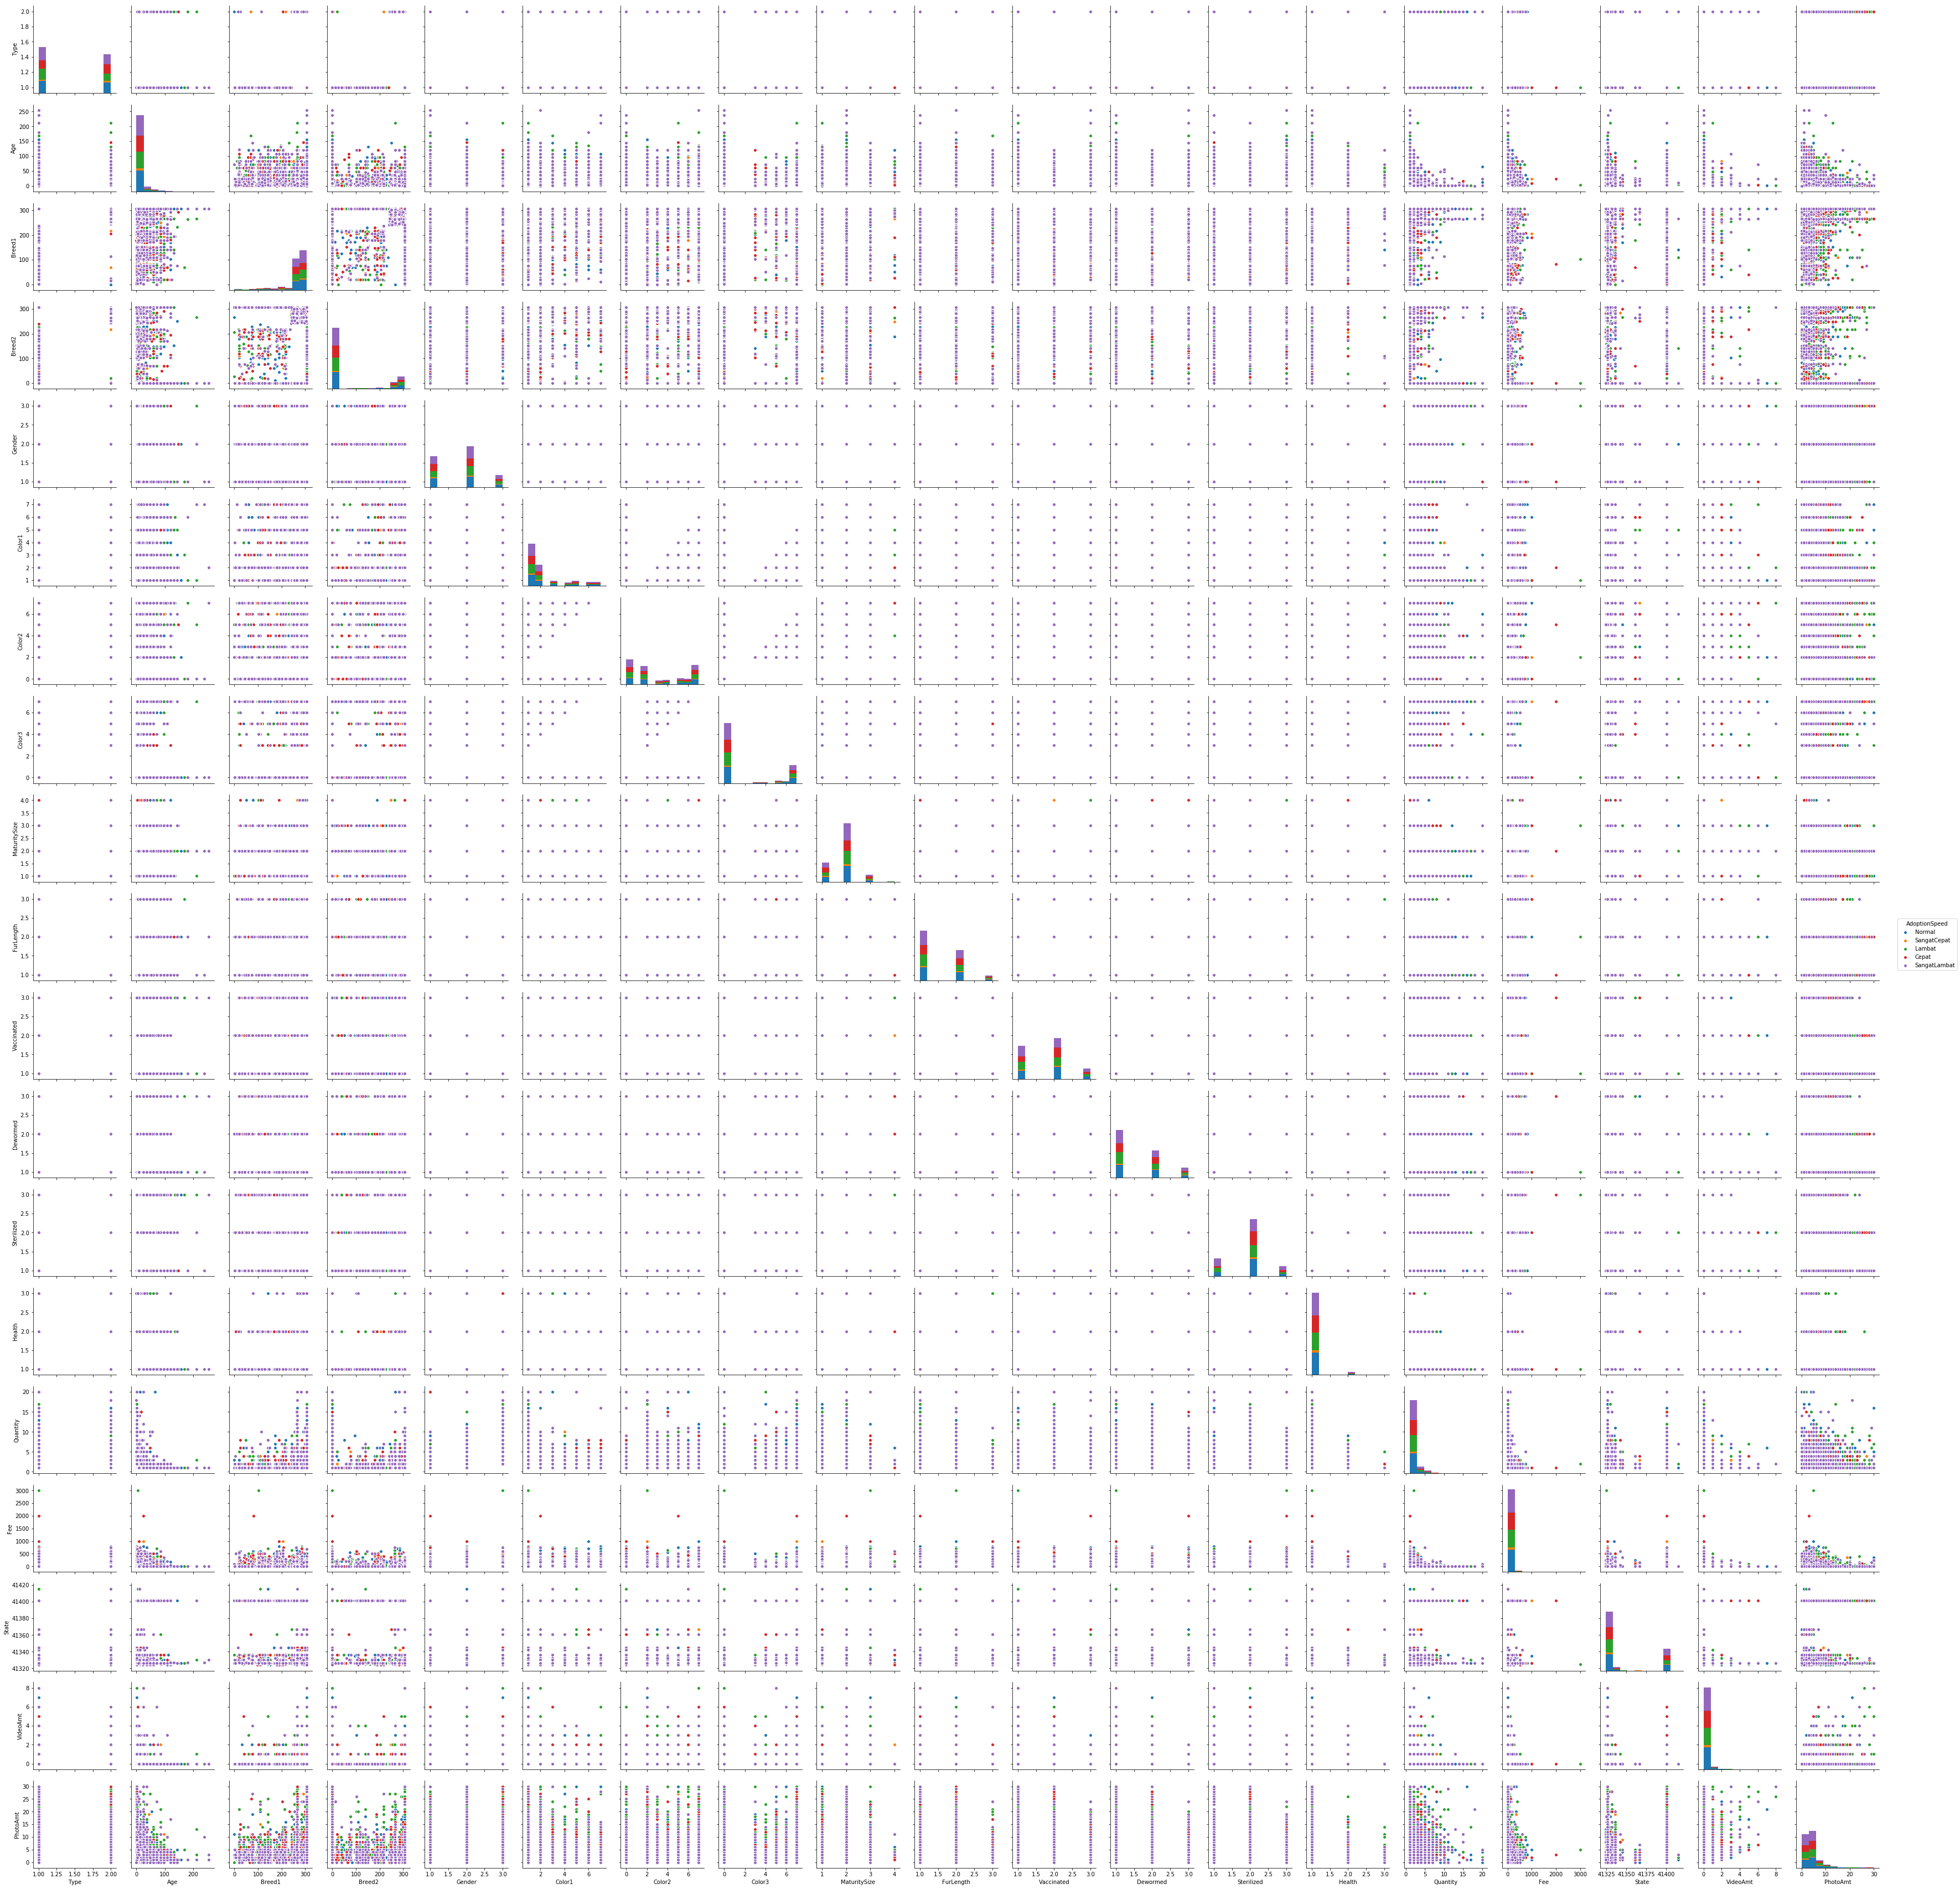

In [13]:
plotTDes=sns.pairplot(DataPlot,hue='AdoptionSpeed')
plot.show()

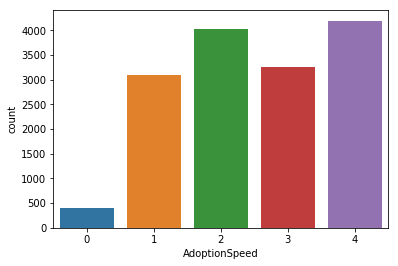

In [14]:
sns.countplot(y)
plot.show()

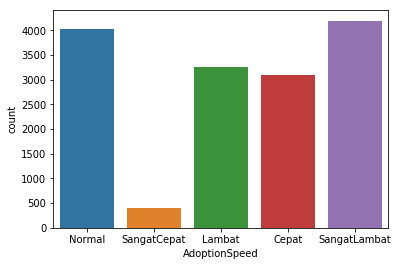

In [15]:
sns.countplot(DataPlot['AdoptionSpeed'])
plot.show()

In [103]:
train.corr()

Type       Age    Breed1    Breed2    Gender    Color1  \
Type           1.000000 -0.147162  0.057724 -0.043568  0.060843  0.097680   
Age           -0.147162  1.000000 -0.314346 -0.041010 -0.123423  0.090378   
Breed1         0.057724 -0.314346  1.000000 -0.157053  0.071321 -0.035510   
Breed2        -0.043568 -0.041010 -0.157053  1.000000  0.056907 -0.020324   
Gender         0.060843 -0.123423  0.071321  0.056907  1.000000 -0.115351   
Color1         0.097680  0.090378 -0.035510 -0.020324 -0.115351  1.000000   
Color2         0.246333 -0.039427 -0.007081  0.003015  0.026507 -0.113290   
Color3         0.201693 -0.053546 -0.000682  0.035679  0.259309 -0.282897   
MaturitySize  -0.171811  0.093673 -0.010507  0.049879 -0.091819 -0.029468   
FurLength      0.003036  0.153092 -0.108059  0.106220 -0.030404  0.066967   
Vaccinated     0.102907 -0.136061  0.046518  0.005638  0.078702 -0.017475   
Dewormed       0.025508 -0.053360  0.013216 -0.009817  0.091431 -0.019318   
Sterilized     0.006737 -0.189450  0.052698 -0.005989  0.040645 -0.037050   
Health        -0.006864  0.103215 -0.034893 -0.029285 -0.045177  0.024410   
Quantity       0.036423 -0.113076  0.090194  0.038125  0.494489 -0.116688   
Fee           -0.042134  0.089168 -0.189526  0.013508 -0.050491  0.054180   
State          0.124549  0.024523 -0.026832 -0.037993  0.002564  0.024012   
VideoAmt      -0.005967 -0.015969  0.020626  0.001569  0.016816 -0.006435   
PhotoAmt       0.049368 -0.084778  0.043395  0.045953  0.098435 -0.041323   
AdoptionSpeed -0.091240  0.100510  0.107834 -0.018642  0.057622 -0.044192   

                 Color2    Color3  MaturitySize  FurLength  Vaccinated  \
Type           0.246333  0.201693     -0.171811   0.003036    0.102907   
Age           -0.039427 -0.053546      0.093673   0.153092   -0.136061   
Breed1        -0.007081 -0.000682     -0.010507  -0.108059    0.046518   
Breed2         0.003015  0.035679      0.049879   0.106220    0.005638   
Gender         0.026507  0.259309     -0.091819  -0.030404    0.078702   
Color1        -0.113290 -0.282897     -0.029468   0.066967   -0.017475   
Color2         1.000000  0.088742     -0.065155  -0.008764    0.026193   
Color3         0.088742  1.000000     -0.051730   0.013581    0.054053   
MaturitySize  -0.065155 -0.051730      1.000000   0.095142   -0.087722   
FurLength     -0.008764  0.013581      0.095142   1.000000   -0.006010   
Vaccinated     0.026193  0.054053     -0.087722  -0.006010    1.000000   
Dewormed       0.005812  0.048617     -0.067352   0.016463    0.722596   
Sterilized     0.007370  0.038899     -0.066321   0.032092    0.471204   
Health        -0.004307 -0.024782     -0.012957   0.028096    0.078893   
Quantity       0.019876  0.272548     -0.042832  -0.038388    0.125287   
Fee           -0.017308 -0.019839      0.041144   0.159693   -0.121868   
State          0.026944  0.010554     -0.062584  -0.029317    0.032737   
VideoAmt       0.023983  0.019526      0.017032  -0.014740   -0.032685   
PhotoAmt       0.059113  0.103662      0.015593  -0.031557   -0.052719   
AdoptionSpeed -0.038579 -0.007014      0.045653  -0.091337   -0.059043   

               Dewormed  Sterilized    Health  Quantity       Fee     State  \
Type           0.025508    0.006737 -0.006864  0.036423 -0.042134  0.124549   
Age           -0.053360   -0.189450  0.103215 -0.113076  0.089168  0.024523   
Breed1         0.013216    0.052698 -0.034893  0.090194 -0.189526 -0.026832   
Breed2        -0.009817   -0.005989 -0.029285  0.038125  0.013508 -0.037993   
Gender         0.091431    0.040645 -0.045177  0.494489 -0.050491  0.002564   
Color1        -0.019318   -0.037050  0.024410 -0.116688  0.054180  0.024012   
Color2         0.005812    0.007370 -0.004307  0.019876 -0.017308  0.026944   
Color3         0.048617    0.038899 -0.024782  0.272548 -0.019839  0.010554   
MaturitySize  -0.067352   -0.066321 -0.012957 -0.042832  0.041144 -0.062584   
FurLength      0.016463    0.032092  0.028096 -0.038388 

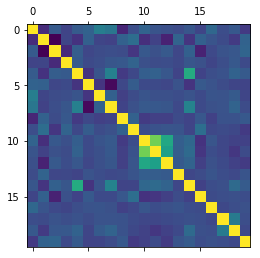

In [102]:
import matplotlib.pyplot as plt

plt.matshow(train.corr())

In [16]:
#Initializes plotting library and functions for 3D scatter plots 
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [17]:
def rename_columns(df, prefix='X'):
    
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [84]:
df = pd.DataFrame(x)
# ensure all values are positive (this is needed for our customer 360 use-case)
df = df.abs()
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = y

# split df into cluster groups
grouped = df.groupby(['y'], sort=True)
# compute sums for every column in every group
sums = grouped.sum()
sums

XType     XAge    XBreed1   XBreed2  XGender  XColor1  XColor2  XColor3  \
y                                                                             
0   650.0   4285.0   102950.0   39596.0    706.0    985.0   1439.0    885.0   
1  4745.0  26229.0   790685.0  226216.0   5338.0   7337.0  10319.0   5778.0   
2  5910.0  35621.0  1073555.0  293185.0   7044.0   9017.0  13127.0   7712.0   
3  4569.0  33209.0   855192.0  263271.0   5888.0   7071.0  10586.0   5933.0   
4  5980.0  57364.0  1154850.0  287360.0   7654.0   9087.0  12849.0   7909.0   

   XMaturitySize  XFurLength  XVaccinated  XDewormed  XSterilized  XHealth  \
y                                                                            
0          728.0       682.0        732.0      674.0        820.0    429.0   
1         5628.0      4785.0       5563.0     4938.0       6164.0   3183.0   
2         7517.0      5923.0       7053.0     6218.0       7777.0   4155.0   
3         6145.0      4678.0       5480.0     4887.0       6086.0   3379.0   
4         7899.0      5934.0       7128.0     6653.0       7853.0   4396.0   

   XQuantity     XFee       XState  XVideoAmt  XPhotoAmt  
y                                                         
0      580.0   9055.0   16952467.0       25.0     1363.0  
1     4525.0  67431.0  127760829.0      139.0    11517.0  
2     6263.0  87129.0  166910545.0      256.0    16438.0  
3     5000.0  65674.0  134738751.0      237.0    15059.0  
4     7262.0  89462.0  173538411.0      194.0    13934.0

In [19]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(sums)
df_normalized = pd.DataFrame(np_scaled)
df_normalized

0         1         2         3         4         5         6   \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.768293  0.413422  0.653803  0.735915  0.666667  0.784004  0.759754   
2  0.986867  0.590365  0.922716  1.000000  0.912205  0.991360  1.000000   
3  0.735272  0.544924  0.715127  0.882037  0.745826  0.751173  0.782598   
4  1.000000  1.000000  1.000000  0.977030  1.000000  1.000000  0.976215   

         7         8         9         10        11        12        13  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.696612  0.683308  0.781226  0.755316  0.713163  0.759846  0.694227   
2  0.971953  0.946730  0.997906  0.988274  0.927245  0.989194  0.939249   
3  0.718679  0.755404  0.760853  0.742339  0.704633  0.748756  0.743635   
4  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

         14        15        16        17        18  
0  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.590392  0.726006  0.707652  0.493506  0.673566  
2  0.850494  0.970985  0.957673  1.000000  1.000000  
3  0.661479  0.704155  0.752215  0.917749  0.908524  
4  1.000000  1.000000  1.000000  0.731602  0.833897

In [97]:
data = [go.Heatmap( z=df_normalized.values.tolist(), 
                   y=['SpedAdopt0', 'SpedAdopt1', 'SpedAdopt2', 'SpedAdopt3','SpedAdopt4'],
                   x=['Type',
                      'Age',
                      'Breed1',
                      'Breed2',
                      'Gender',
                      'Color1',
                      'Color2',
                      'Color3',
                      'MaturitySize',
                      'FurLength',
                      'Vaccinated',
                      'Dewormed',
                      'Sterilized',
                      'Health',
                      'Quantity',
                      'Fee',
                      'State',
                      'VideoAmt',
                      'PhotoAmt'
                    ],
                   colorscale='Viridis')]

plotly.offline.iplot(data, filename='Plot High Dimensional PetFinder')

In [24]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 20 columns):
Type             14993 non-null int64
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null int64
dtypes: float64(1), int64(19)
memory usage: 2.3 MB


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [27]:
#Membagi data train dan validasi
training_features, val_features, \
training_target, val_target, = train_test_split(x,
                                                y,
                                               test_size = .1,
                                               random_state=12)

In [28]:
val_features=val_features.values
val_target=val_target.values

In [29]:
training_features.shape

(13493, 19)

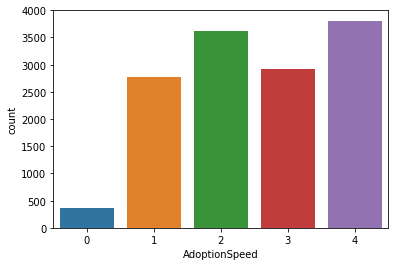

In [30]:
sns.countplot(training_target) 

In [31]:
#jika masih ada katagorik uncoment dan run ini
#data_relevant = pd.get_dummies(data_relevent)

In [32]:
#Oversampling

sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(training_features, training_target)

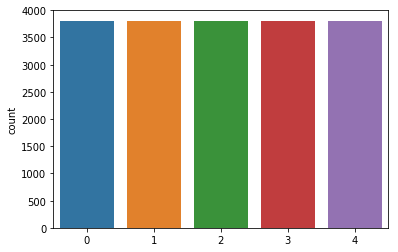

In [33]:
sns.countplot(y_res) 

In [88]:
df_OS = pd.DataFrame(x_res)
# ensure all values are positive (this is needed for our customer 360 use-case)
df_OS = df_OS.abs()
# rename X columns
df_OS = rename_columns(df_OS)
# and add the Y
df_OS['y'] = y_res

# split df into cluster groups
grouped_OS = df_OS.groupby(['y'], sort=True)
# compute sums for every column in every group
sums_OS = grouped_OS.sum()

In [89]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(sums_OS)
df_normalized_OS = pd.DataFrame(np_scaled)
df_normalized_OS

0         1         2         3         4         5         6   \
0  1.000000  0.140662  0.000000  1.000000  0.000000  0.802408  1.000000   
1  0.757854  0.000000  0.120777  0.163399  0.297868  1.000000  0.716603   
2  0.340741  0.099376  0.611393  0.140480  0.321874  0.350535  0.396586   
3  0.000000  0.346759  0.456731  0.402795  0.840091  0.000000  0.539865   
4  0.108529  1.000000  1.000000  0.000000  1.000000  0.110100  0.000000   

         7         8         9         10        11        12        13  \
0  1.000000  0.000000  1.000000  0.890484  1.000000  0.932039  0.649863   
1  0.164102  0.396165  0.582934  1.000000  0.724370  1.000000  0.065467   
2  0.255883  0.759461  0.207821  0.519766  0.257152  0.419584  0.000000   
3  0.000000  1.000000  0.075688  0.000000  0.000000  0.001845  0.267988   
4  0.223615  0.956185  0.000000  0.142346  0.560998  0.000000  1.000000   

         14        15        16        17        18  
0  0.000000  0.000000  0.623013  0.501419  0.000000  
1  0.225495  0.690460  0.773608  0.000000  0.314485  
2  0.451311  1.000000  0.408740  0.611644  0.620103  
3  0.425687  0.674659  0.000000  1.000000  1.000000  
4  1.000000  0.846888  1.000000  0.067706  0.041016

In [100]:
data = [go.Heatmap( z=df_normalized_OS.values.tolist(), 
                   y=['SpedAdopt0', 'SpedAdopt1', 'SpedAdopt2', 'SpedAdopt3','SpedAdopt4'],
                   x=['Type',
                      'Age',
                      'Breed1',
                      'Breed2',
                      'Gender',
                      'Color1',
                      'Color2',
                      'Color3',
                      'MaturitySize',
                      'FurLength',
                      'Vaccinated',
                      'Dewormed',
                      'Sterilized',
                      'Health',
                      'Quantity',
                      'Fee',
                      'State',
                      'VideoAmt',
                      'PhotoAmt'
                    ],
                   colorscale='Viridis')]

plotly.offline.iplot(data, filename='Plot High Dimensional PetFinder')

# Prediction

## Neural Network

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(19, 25)
        self.fc2 = nn.Linear(25, 10)
        self.fc3 = nn.Linear(10,5)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.softmax(x)        
        return x
    
net = Net()

In [69]:
batch_size = 100
num_epochs = 5000
learning_rate = 0.0001
batch_no = len(x_res) // batch_size

In [70]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [74]:
Accuration_train_tmp=[]
Accuration_val_tmp=[]
log_loss=[]

In [72]:
PATH1="./PetFinderSTATDES.pth"

In [73]:
from sklearn.utils import shuffle
from torch.autograd import Variable


for epoch in range(num_epochs):
    x_train, y_train = shuffle(x_res, y_res)
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_var = Variable(torch.FloatTensor(x_train[start:end]))
        y_var = Variable(torch.LongTensor(y_train[start:end]))
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        ypred_var = net(x_var)
        loss =criterion(ypred_var, y_var)
        loss.backward()
        optimizer.step()   
    log_loss.append(loss)

    # Evaluate the model On Validation Data
    val_var = Variable(torch.FloatTensor(val_features), requires_grad=True)
    with torch.no_grad():
        result_t = net(val_var)
    values_t, labels_t = torch.max(result_t, 1)
    num_right_t = np.sum(labels_t.data.numpy() == val_target)
    Accuration_val=num_right_t / len(val_target)
    Accuration_val_tmp.append(Accuration_val)

    # Evaluate the model On Train Data
    test_var = Variable(torch.FloatTensor(x_res), requires_grad=True)
    with torch.no_grad():
        result = net(test_var)
    values, labels = torch.max(result, 1)
    num_right = np.sum(labels.data.numpy() == y_res)
    Accuration_train=num_right / len(y_res)
    Accuration_train_tmp.append(Accuration_train)
    # Print Epoch dan accuration 
    print('Epoch {0}/{1} |Accuracy_Val {2:0.2f} |Accuracy_Train {3:0.2f} |Loss {4}  '.format(epoch+1,num_epochs,Accuration_val,
                                                                                         Accuration_train,loss.item()))
#save model after train
torch.save({'epoch': epoch,
            'PetFinder':net.state_dict(),
            'Loss':loss
            },PATH1)

Epoch 1/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6050130128860474  
Epoch 2/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6118110418319702  
Epoch 3/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6104861497879028  
Epoch 4/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.613610863685608  
Epoch 5/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6115705966949463  
Epoch 6/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6108468770980835  
Epoch 7/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6111642122268677  
Epoch 8/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.60945463180542  
Epoch 9/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6107059717178345  
Epoch 10/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6128612756729126  
Epoch 11/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6076678037643433  
Epoch 12/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6116340160369873  
Epoch 13/5000 |Accuracy_Val 0.22 |Accura

Epoch 102/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094636917114258  
Epoch 103/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094735860824585  
Epoch 104/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094478368759155  
Epoch 105/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094645261764526  
Epoch 106/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094125509262085  
Epoch 107/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094708442687988  
Epoch 108/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.60947585105896  
Epoch 109/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094306707382202  
Epoch 110/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609402060508728  
Epoch 111/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095088720321655  
Epoch 112/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094558238983154  
Epoch 113/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094298362731934  
Epoch 114/5000 |Acc

Epoch 202/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094399690628052  
Epoch 203/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094475984573364  
Epoch 204/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609483242034912  
Epoch 205/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094566583633423  
Epoch 206/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094468832015991  
Epoch 207/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094528436660767  
Epoch 208/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094170808792114  
Epoch 209/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094378232955933  
Epoch 210/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609427809715271  
Epoch 211/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609473466873169  
Epoch 212/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6095061302185059  
Epoch 213/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609535813331604  
Epoch 214/5000 |Accu

Epoch 302/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609449028968811  
Epoch 303/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094589233398438  
Epoch 304/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094495058059692  
Epoch 305/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609465479850769  
Epoch 306/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609447956085205  
Epoch 307/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6093969345092773  
Epoch 308/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094011068344116  
Epoch 309/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094627380371094  
Epoch 310/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094703674316406  
Epoch 311/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094518899917603  
Epoch 312/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094887256622314  
Epoch 313/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609431266784668  
Epoch 314/5000 |Accu

Epoch 402/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095696687698364  
Epoch 403/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094616651535034  
Epoch 404/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094348430633545  
Epoch 405/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609543800354004  
Epoch 406/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094833612442017  
Epoch 407/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609543800354004  
Epoch 408/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094765663146973  
Epoch 409/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609486699104309  
Epoch 410/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094725131988525  
Epoch 411/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094262599945068  
Epoch 412/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609411358833313  
Epoch 413/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094731092453003  
Epoch 414/5000 |Accu

Epoch 502/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609501838684082  
Epoch 503/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095595359802246  
Epoch 504/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094473600387573  
Epoch 505/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094952821731567  
Epoch 506/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094272136688232  
Epoch 507/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609446406364441  
Epoch 508/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609404444694519  
Epoch 509/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094964742660522  
Epoch 510/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609451174736023  
Epoch 511/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095794439315796  
Epoch 512/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094893217086792  
Epoch 513/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094714403152466  
Epoch 514/5000 |Accu

Epoch 602/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609500765800476  
Epoch 603/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094894409179688  
Epoch 604/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094623804092407  
Epoch 605/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094342470169067  
Epoch 606/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094295978546143  
Epoch 607/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.60947847366333  
Epoch 608/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094955205917358  
Epoch 609/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094087362289429  
Epoch 610/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094064712524414  
Epoch 611/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609438419342041  
Epoch 612/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094768047332764  
Epoch 613/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094355583190918  
Epoch 614/5000 |Accu

Epoch 702/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094880104064941  
Epoch 703/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094186305999756  
Epoch 704/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094462871551514  
Epoch 705/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094683408737183  
Epoch 706/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094547510147095  
Epoch 707/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094253063201904  
Epoch 708/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094473600387573  
Epoch 709/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094720363616943  
Epoch 710/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609490156173706  
Epoch 711/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094588041305542  
Epoch 712/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094374656677246  
Epoch 713/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609468936920166  
Epoch 714/5000 |Ac

Epoch 802/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094627380371094  
Epoch 803/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094955205917358  
Epoch 804/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095231771469116  
Epoch 805/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094707250595093  
Epoch 806/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094374656677246  
Epoch 807/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094412803649902  
Epoch 808/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094970703125  
Epoch 809/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094911098480225  
Epoch 810/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094443798065186  
Epoch 811/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609541893005371  
Epoch 812/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609459400177002  
Epoch 813/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094509363174438  
Epoch 814/5000 |Accur

Epoch 902/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094672679901123  
Epoch 903/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6093878746032715  
Epoch 904/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094365119934082  
Epoch 905/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094366312026978  
Epoch 906/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609385371208191  
Epoch 907/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094952821731567  
Epoch 908/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095259189605713  
Epoch 909/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094266176223755  
Epoch 910/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095566749572754  
Epoch 911/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095101833343506  
Epoch 912/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094964742660522  
Epoch 913/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094282865524292  
Epoch 914/5000 |A

Epoch 1002/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094355583190918  
Epoch 1003/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094026565551758  
Epoch 1004/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094865798950195  
Epoch 1005/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094862222671509  
Epoch 1006/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094622611999512  
Epoch 1007/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094592809677124  
Epoch 1008/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609471321105957  
Epoch 1009/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094326972961426  
Epoch 1010/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094465255737305  
Epoch 1011/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094677448272705  
Epoch 1012/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609560251235962  
Epoch 1013/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094653606414795  
Epoch 

Epoch 1100/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609440803527832  
Epoch 1101/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6095272302627563  
Epoch 1102/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094404458999634  
Epoch 1103/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094921827316284  
Epoch 1104/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609502911567688  
Epoch 1105/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095452308654785  
Epoch 1106/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094369888305664  
Epoch 1107/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094310283660889  
Epoch 1108/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095176935195923  
Epoch 1109/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609490990638733  
Epoch 1110/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095167398452759  
Epoch 1111/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094833612442017  
Epoch 1

Epoch 1198/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609468936920166  
Epoch 1199/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609487771987915  
Epoch 1200/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094975471496582  
Epoch 1201/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094437837600708  
Epoch 1202/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094568967819214  
Epoch 1203/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094549894332886  
Epoch 1204/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6093863248825073  
Epoch 1205/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6096616983413696  
Epoch 1206/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609489917755127  
Epoch 1207/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6093924045562744  
Epoch 1208/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6093966960906982  
Epoch 1209/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095103025436401  
Epoch 1

Epoch 1296/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094375848770142  
Epoch 1297/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609431505203247  
Epoch 1298/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094460487365723  
Epoch 1299/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609420895576477  
Epoch 1300/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094688177108765  
Epoch 1301/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094416379928589  
Epoch 1302/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6093958616256714  
Epoch 1303/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094454526901245  
Epoch 1304/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094956398010254  
Epoch 1305/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6093792915344238  
Epoch 1306/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094305515289307  
Epoch 1307/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094180345535278  
Epoch 

Epoch 1394/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094763278961182  
Epoch 1395/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094342470169067  
Epoch 1396/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094355583190918  
Epoch 1397/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094536781311035  
Epoch 1398/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094768047332764  
Epoch 1399/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094849109649658  
Epoch 1400/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095330715179443  
Epoch 1401/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094757318496704  
Epoch 1402/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.60942804813385  
Epoch 1403/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609486699104309  
Epoch 1404/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094751358032227  
Epoch 1405/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094478368759155  
Epoch 1

Epoch 1492/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094821691513062  
Epoch 1493/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094551086425781  
Epoch 1494/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609555721282959  
Epoch 1495/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094268560409546  
Epoch 1496/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094225645065308  
Epoch 1497/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094856262207031  
Epoch 1498/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095188856124878  
Epoch 1499/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094523668289185  
Epoch 1500/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094374656677246  
Epoch 1501/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094495058059692  
Epoch 1502/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094517707824707  
Epoch 1503/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094447374343872  
Epoch

Epoch 1590/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609433889389038  
Epoch 1591/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094650030136108  
Epoch 1592/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609453558921814  
Epoch 1593/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095563173294067  
Epoch 1594/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094534397125244  
Epoch 1595/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094859838485718  
Epoch 1596/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094125509262085  
Epoch 1597/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094751358032227  
Epoch 1598/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094685792922974  
Epoch 1599/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094763278961182  
Epoch 1600/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095681190490723  
Epoch 1601/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094059944152832  
Epoch 

Epoch 1688/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609429121017456  
Epoch 1689/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609490156173706  
Epoch 1690/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.60942804813385  
Epoch 1691/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094650030136108  
Epoch 1692/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094567775726318  
Epoch 1693/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609473466873169  
Epoch 1694/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094653606414795  
Epoch 1695/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095261573791504  
Epoch 1696/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609485149383545  
Epoch 1697/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094636917114258  
Epoch 1698/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094328165054321  
Epoch 1699/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094719171524048  
Epoch 1700

Epoch 1787/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.60941481590271  
Epoch 1788/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609452486038208  
Epoch 1789/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6095778942108154  
Epoch 1790/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094298362731934  
Epoch 1791/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094547510147095  
Epoch 1792/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094743013381958  
Epoch 1793/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094026565551758  
Epoch 1794/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609421968460083  
Epoch 1795/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095086336135864  
Epoch 1796/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609471082687378  
Epoch 1797/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094691753387451  
Epoch 1798/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609466552734375  
Epoch 1799

Epoch 1886/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094398498535156  
Epoch 1887/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094467639923096  
Epoch 1888/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095995903015137  
Epoch 1889/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094863414764404  
Epoch 1890/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609424114227295  
Epoch 1891/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094340085983276  
Epoch 1892/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609442114830017  
Epoch 1893/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095248460769653  
Epoch 1894/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094392538070679  
Epoch 1895/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094491481781006  
Epoch 1896/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094435453414917  
Epoch 1897/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094915866851807  
Epoch 

Epoch 1984/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094738245010376  
Epoch 1985/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095656156539917  
Epoch 1986/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094785928726196  
Epoch 1987/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094645261764526  
Epoch 1988/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094982624053955  
Epoch 1989/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094214916229248  
Epoch 1990/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094697713851929  
Epoch 1991/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6096062660217285  
Epoch 1992/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094450950622559  
Epoch 1993/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6093776226043701  
Epoch 1994/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609426736831665  
Epoch 1995/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094648838043213  
Epoch

Epoch 2082/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094549894332886  
Epoch 2083/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095050573349  
Epoch 2084/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094871759414673  
Epoch 2085/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609458565711975  
Epoch 2086/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094932556152344  
Epoch 2087/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094560623168945  
Epoch 2088/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094481945037842  
Epoch 2089/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095792055130005  
Epoch 2090/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609429121017456  
Epoch 2091/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609451413154602  
Epoch 2092/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609442949295044  
Epoch 2093/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094334125518799  
Epoch 2094/

Epoch 2181/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6093573570251465  
Epoch 2182/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094310283660889  
Epoch 2183/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094729900360107  
Epoch 2184/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094658374786377  
Epoch 2185/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609440565109253  
Epoch 2186/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095740795135498  
Epoch 2187/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095259189605713  
Epoch 2188/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094937324523926  
Epoch 2189/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609491229057312  
Epoch 2190/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094926595687866  
Epoch 2191/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094672679901123  
Epoch 2192/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609560251235962  
Epoch 2

Epoch 2279/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094540357589722  
Epoch 2280/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609444260597229  
Epoch 2281/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094568967819214  
Epoch 2282/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6093926429748535  
Epoch 2283/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609458565711975  
Epoch 2284/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094770431518555  
Epoch 2285/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095647811889648  
Epoch 2286/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094473600387573  
Epoch 2287/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094573736190796  
Epoch 2288/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609488844871521  
Epoch 2289/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609470248222351  
Epoch 2290/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094356775283813  
Epoch 22

Epoch 2378/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094447374343872  
Epoch 2379/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094971895217896  
Epoch 2380/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6095192432403564  
Epoch 2381/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095138788223267  
Epoch 2382/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609444260597229  
Epoch 2383/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609441876411438  
Epoch 2384/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6095389127731323  
Epoch 2385/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6095083951950073  
Epoch 2386/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6095105409622192  
Epoch 2387/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609465479850769  
Epoch 2388/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609459400177002  
Epoch 2389/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094563007354736  
Epoch 23

Epoch 2477/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609430193901062  
Epoch 2478/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094610691070557  
Epoch 2479/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094340085983276  
Epoch 2480/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.6094459295272827  
Epoch 2481/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094914674758911  
Epoch 2482/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609438180923462  
Epoch 2483/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094427108764648  
Epoch 2484/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.609468698501587  
Epoch 2485/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6093789339065552  
Epoch 2486/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609554648399353  
Epoch 2487/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094598770141602  
Epoch 2488/5000 |Accuracy_Val 0.26 |Accuracy_Train 0.20 |Loss 1.6094505786895752  
Epoch 24

Epoch 2576/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094969511032104  
Epoch 2577/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609528660774231  
Epoch 2578/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094659566879272  
Epoch 2579/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094878911972046  
Epoch 2580/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094610691070557  
Epoch 2581/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609507441520691  
Epoch 2582/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.6094566583633423  
Epoch 2583/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6095221042633057  
Epoch 2584/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.609458565711975  
Epoch 2585/5000 |Accuracy_Val 0.03 |Accuracy_Train 0.20 |Loss 1.6094921827316284  
Epoch 2586/5000 |Accuracy_Val 0.22 |Accuracy_Train 0.20 |Loss 1.609506368637085  
Epoch 2587/5000 |Accuracy_Val 0.28 |Accuracy_Train 0.20 |Loss 1.609415888786316  
Epoch 258

KeyboardInterrupt: 